In [1]:
import pandas as pd
import seaborn as sns
import random
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BIAIS_SN="biais de somme nulle"
SOMME_ECART_ABSOLU="somme des écarts absolus"

In [3]:
meta_df=pd.DataFrame(columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"])

In [4]:
def afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color=None):
    df = pd.read_csv(file,header=None)
    df.columns=[nom_bias]
    sns.displot(df[nom_bias],kde=True,color=color)
    new_row_meta_df= pd.DataFrame(
            [(file,df[nom_bias].mean(),df[nom_bias].std()
             ,df[nom_bias].min()
            ,df[nom_bias].max()
            ,df[nom_bias].median()
             )],
            columns=["file", "biais_sn_moyen", "biais_sn_std","biais_sn_min","biais_sn_max","biais_sn_med"],
        )
    meta_df=pd.concat([meta_df, new_row_meta_df])
    return meta_df

In [5]:
def afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,nom_bias,color=None):
    for file in liste:
        meta_df=afficher_histogramme_et_enregistrer_stat(file,meta_df,nom_bias,color)
    return meta_df

# Simulations Monte-Carlo

## 1. Scenarios d'ajout cumulés et loi uniforme sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

<AxesSubplot:ylabel='Count'>

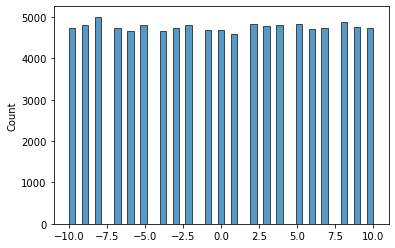

In [6]:
l=[random.randint(-10,10) for _ in range(100000)]
sns.histplot(l)

### 1.1 n=10 ajouts et m=12 entités

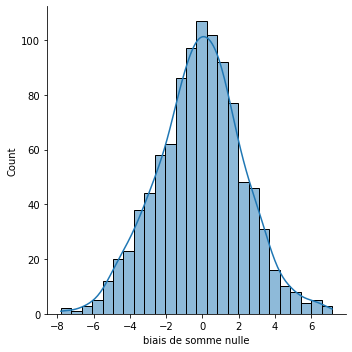

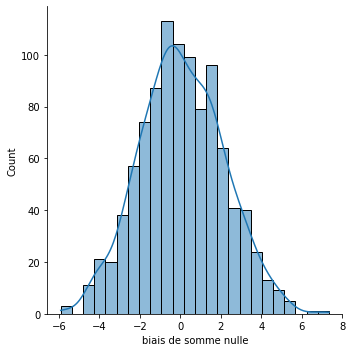

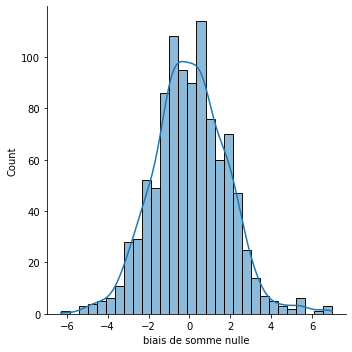

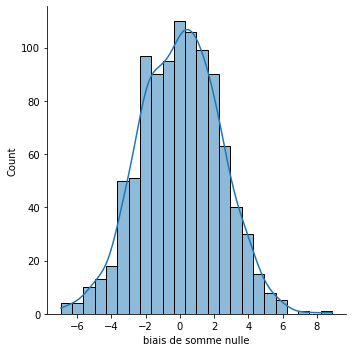

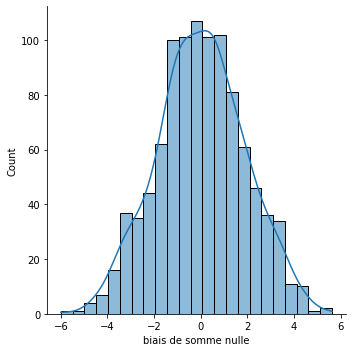

In [7]:
liste=["score_clean.csv","score2_clean.csv","score3_clean.csv","score4_clean.csv","score5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.2 n=10 ajouts et m=13 entités

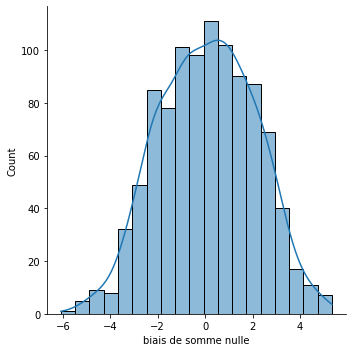

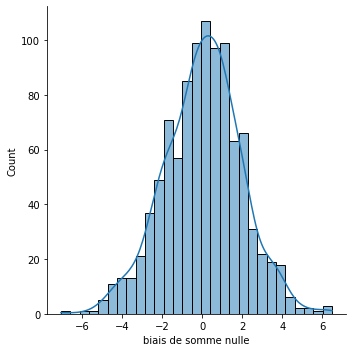

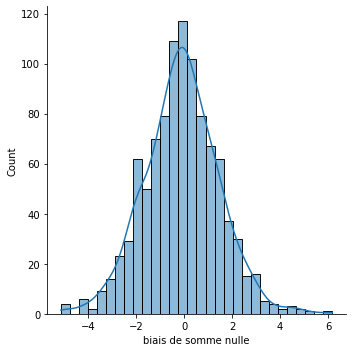

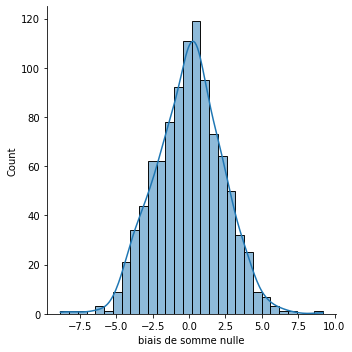

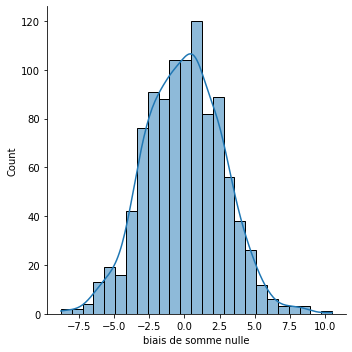

In [8]:
liste=["13_entities_10_samples/score_13_1_clean.csv",
       "13_entities_10_samples/score_13_2_clean.csv",
       "13_entities_10_samples/score_13_3_clean.csv",
       "13_entities_10_samples/score_13_4_clean.csv",
       "13_entities_10_samples/score_13_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.3 n=10 ajouts et m=20 entités

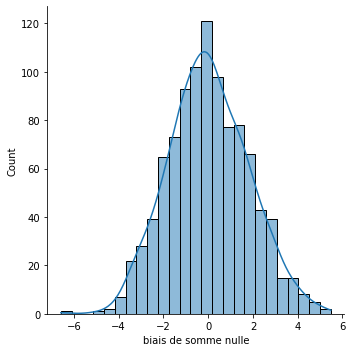

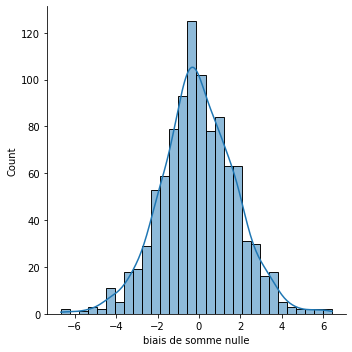

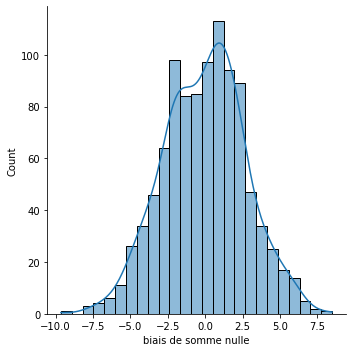

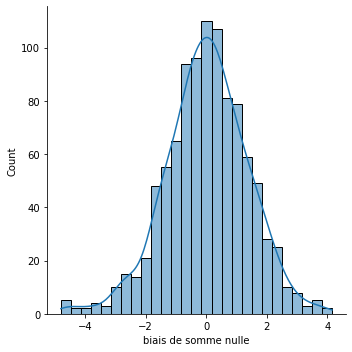

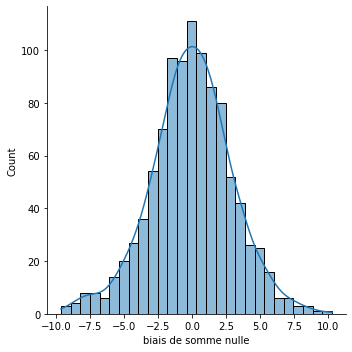

In [9]:
liste=["20_entities_10_samples/score_20_1_clean.csv",
       "20_entities_10_samples/score_20_2_clean.csv",
       "20_entities_10_samples/score_20_3_clean.csv",
       "20_entities_10_samples/score_20_4_clean.csv",
       "20_entities_10_samples/score_20_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220831_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220831_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 1.4 n=10 ajouts et m=100 entités

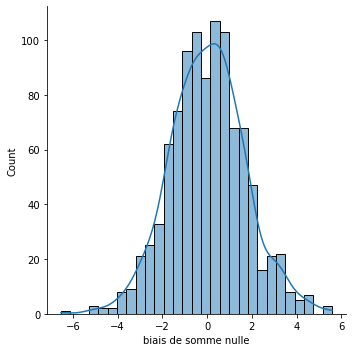

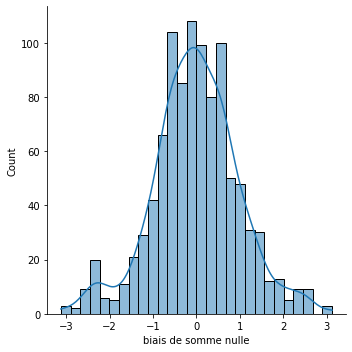

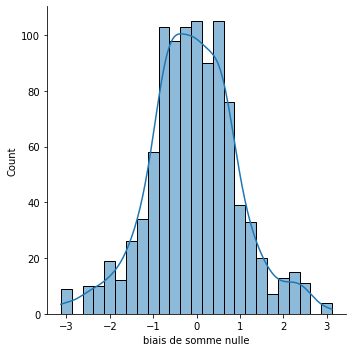

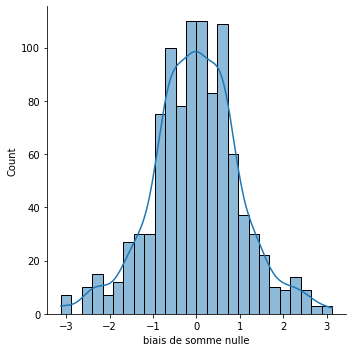

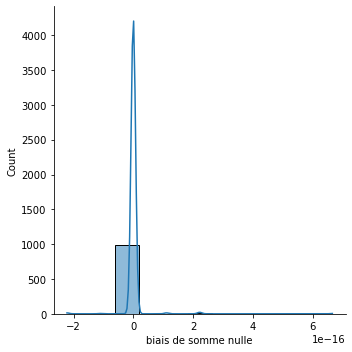

In [10]:
liste=["100_entities_10_samples/score_100_10_1_clean.csv",
       "100_entities_10_samples/score_100_10_2_clean.csv",
       "100_entities_10_samples/score_100_10_3_clean.csv",
       "100_entities_10_samples/score_100_10_4_clean.csv",
       "100_entities_10_samples/score_100_10_5_clean.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 1.5 n=10 ajouts et m=1000 entités

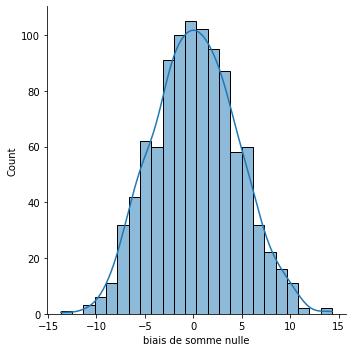

In [11]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_1_clean.csv",meta_df,BIAIS_SN)

### 1.6 n=1 ajouts et m=20 entités

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_uniform_220831_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_uniform_220831_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
### 1.7 n=5 ajouts et m=20 entités

In [ ]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_uniform_220831_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

In [ ]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_uniform_220831_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_uniform_220901_mea_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

## 2. Scenarios d'ajout cumulés et loi gaussienne discrète sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

(array([   4.,   15.,   33.,  100.,  165.,  348.,  496.,  819., 1060.,
        1247., 1315., 1267., 1064.,  854.,  548.,  344.,  187.,   89.,
          25.,   13.,    7.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

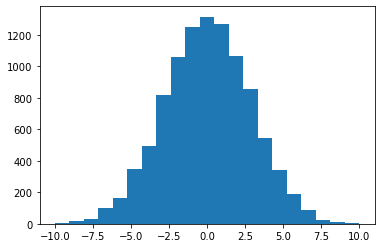

In [12]:
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
prob = prob / prob.sum() # normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 2.1 n=10 ajouts et m=12 entités

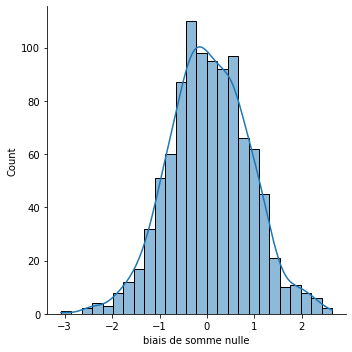

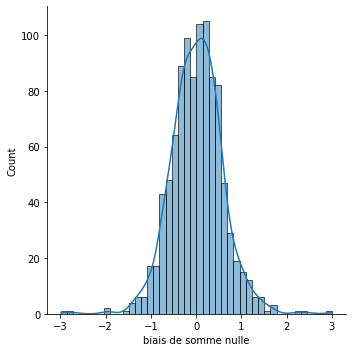

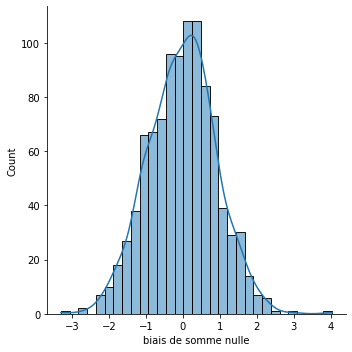

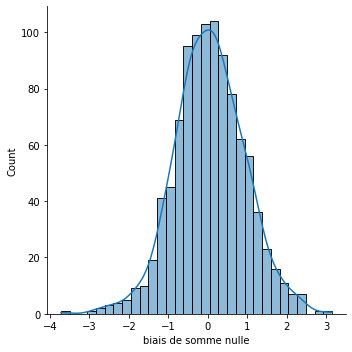

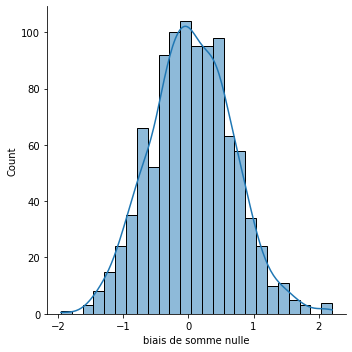

In [13]:
liste=["score_12_10_gauss_clean_1.csv",
       "score_12_10_gauss_clean_2.csv",
      "score_12_10_gauss_clean_3.csv",
      "score_12_10_gauss_clean_4.csv",
      "score_12_10_gauss_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 2.2 n=10 ajouts et m=20 entités

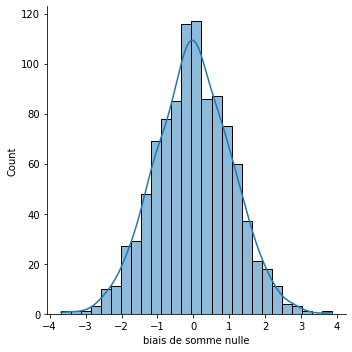

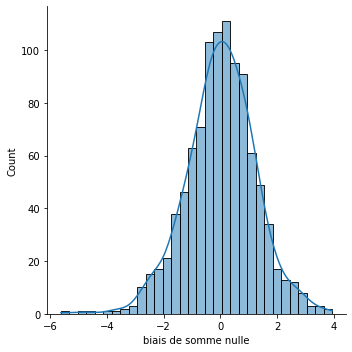

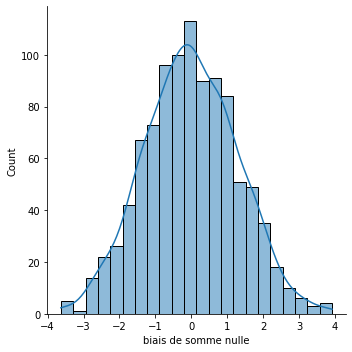

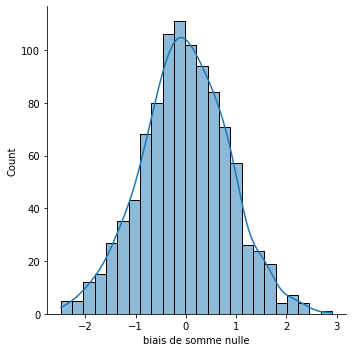

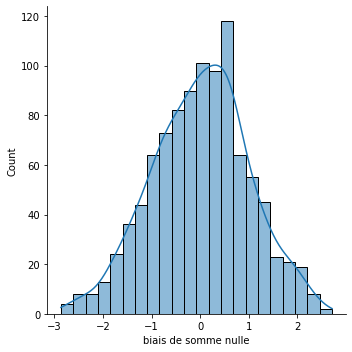

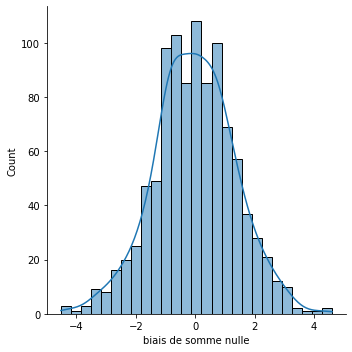

In [14]:
liste=["20_entities_10_samples/score_20_10_gauss_clean_1.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_2.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_3.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_4.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_5.csv",
      "20_entities_10_samples/score_20_10_gauss_clean_6.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

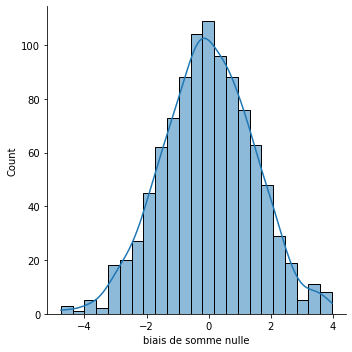

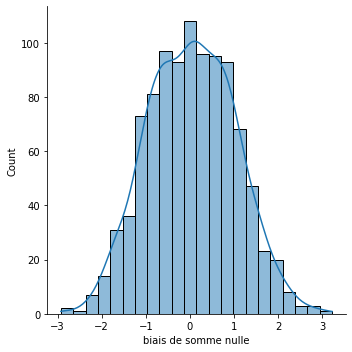

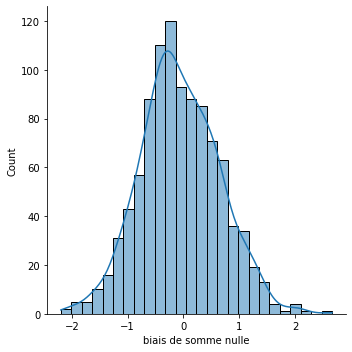

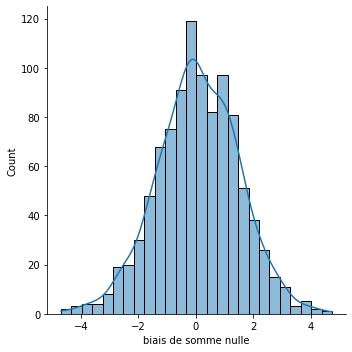

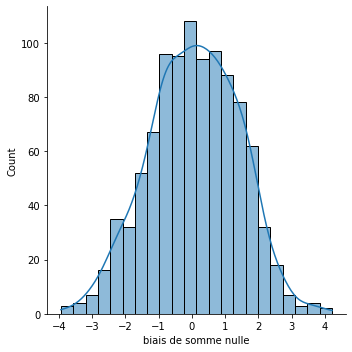

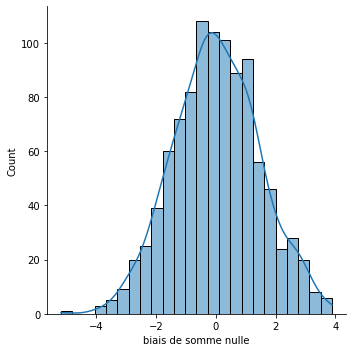

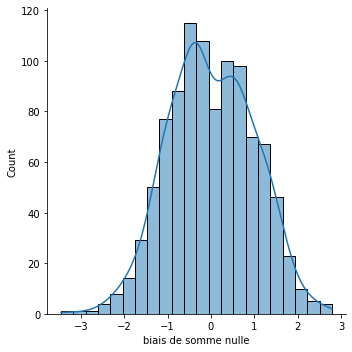

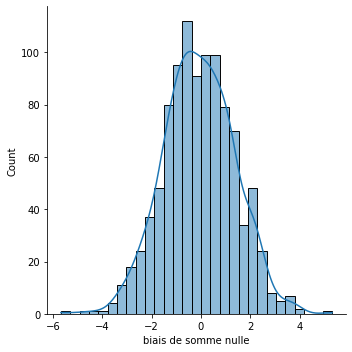

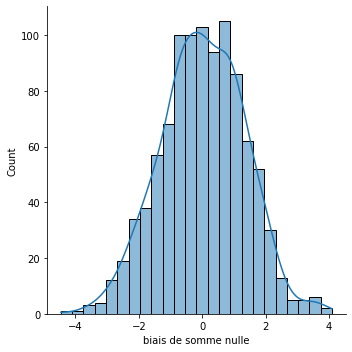

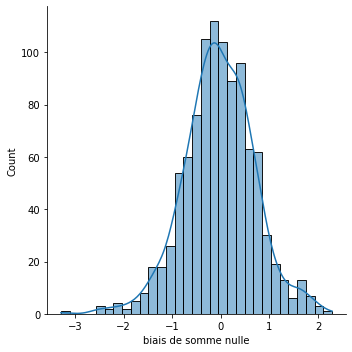

In [15]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,11)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

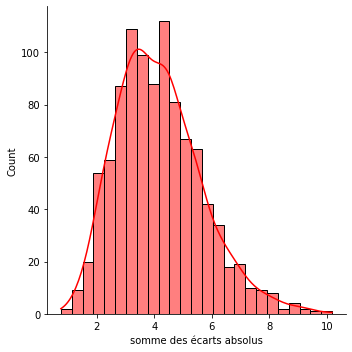

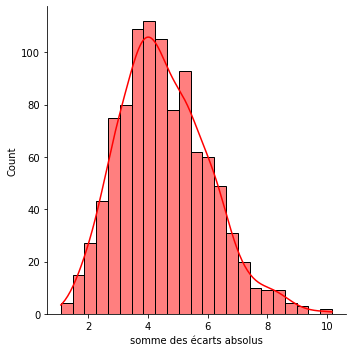

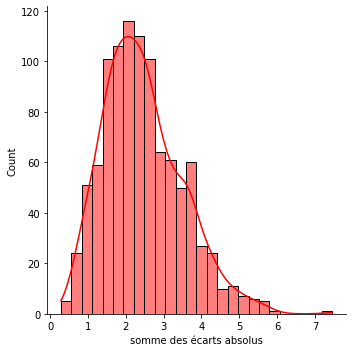

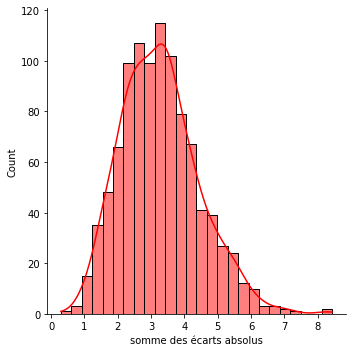

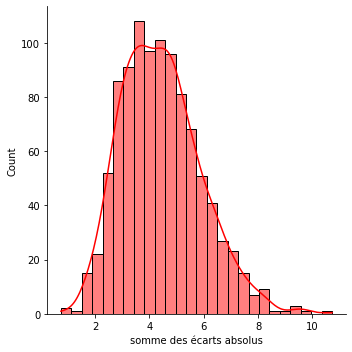

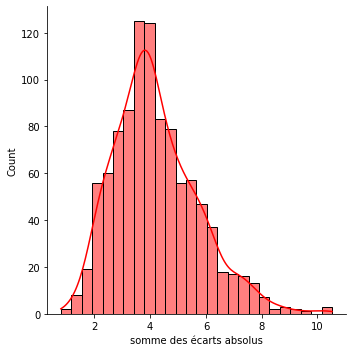

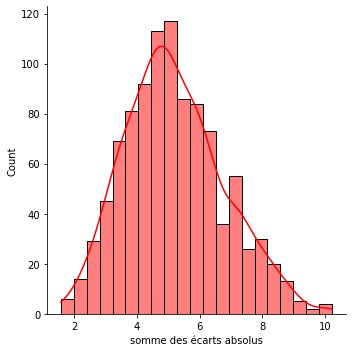

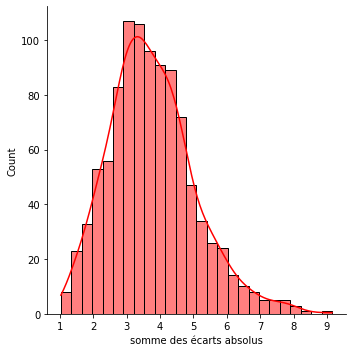

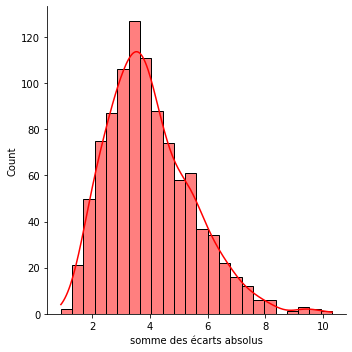

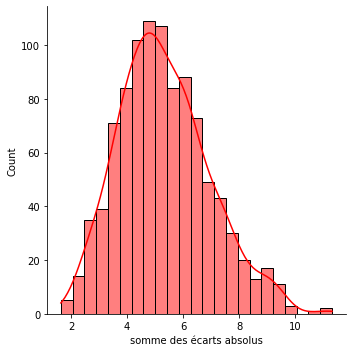

In [16]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,11)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 2.3 n=10 ajouts et m=100 entités

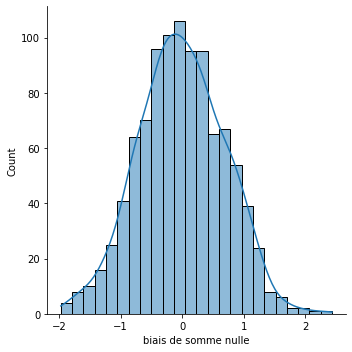

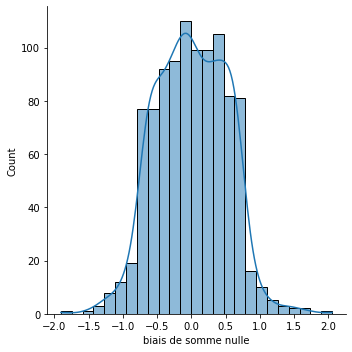

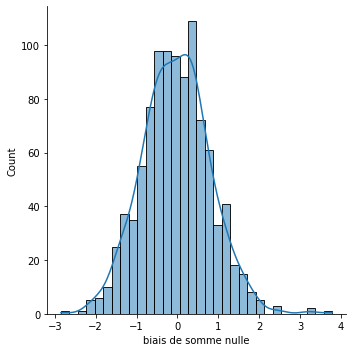

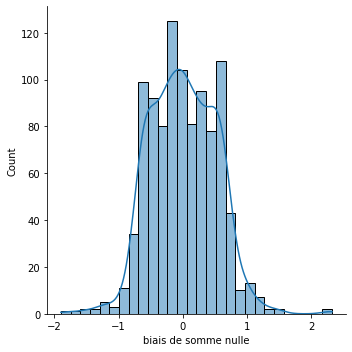

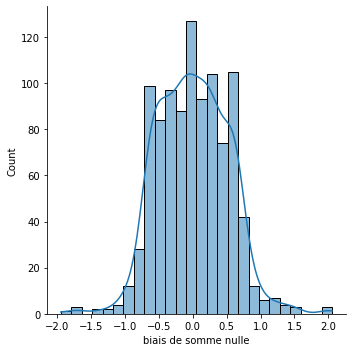

In [17]:
liste=["100_entities_10_samples/score_100_10_gauss_clean_1.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_2.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_3.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_4.csv",
       "100_entities_10_samples/score_100_10_gauss_clean_5.csv",
      ]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 2.4 n=1 ajouts et m=20 entités

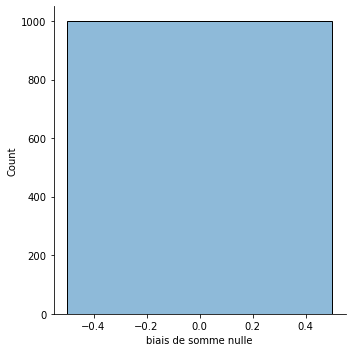

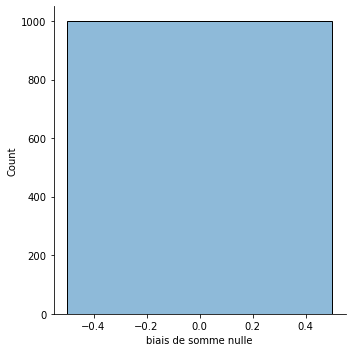

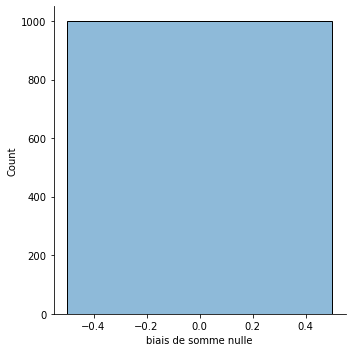

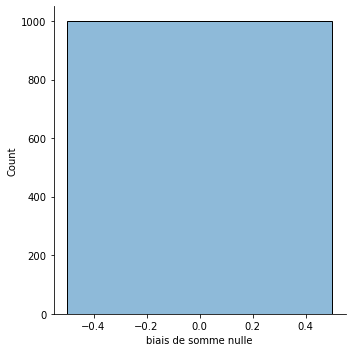

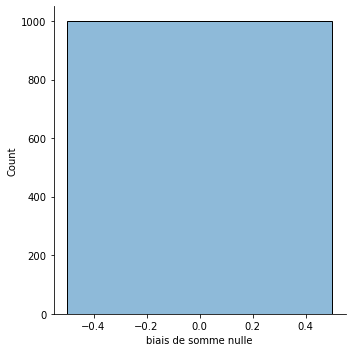

In [18]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

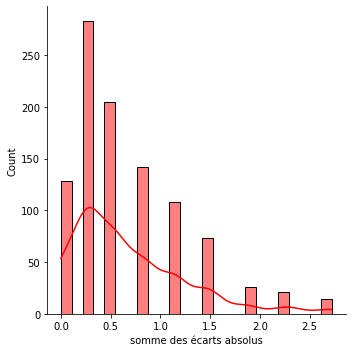

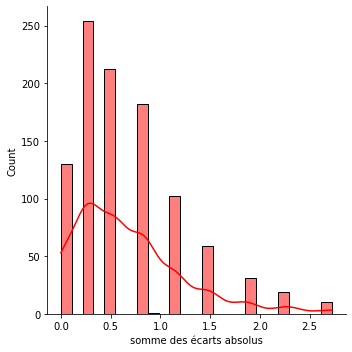

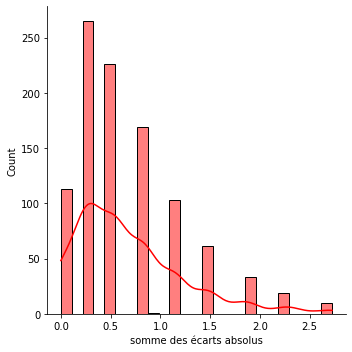

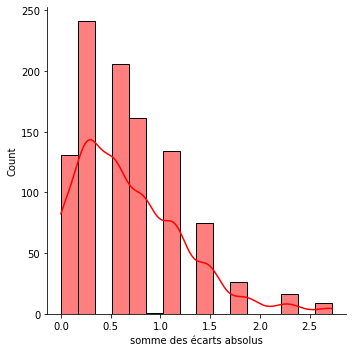

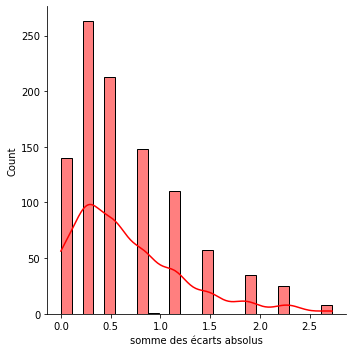

In [19]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 2.5 n=5 ajouts et m=20 entités

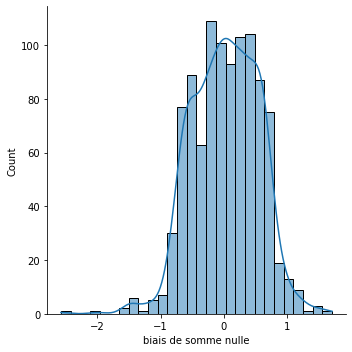

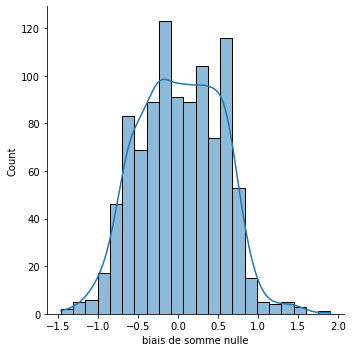

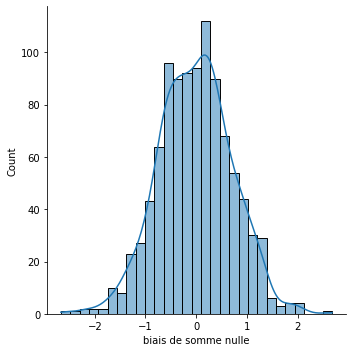

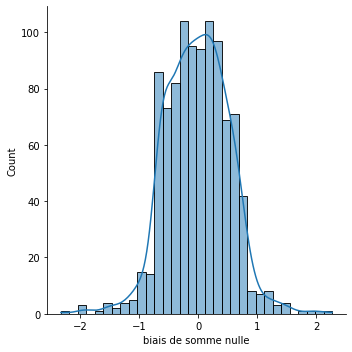

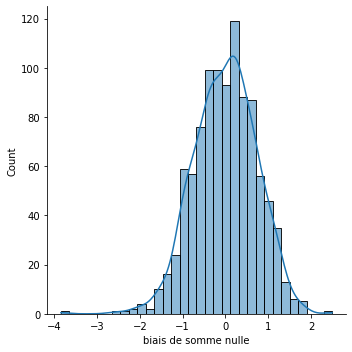

In [20]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_gauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

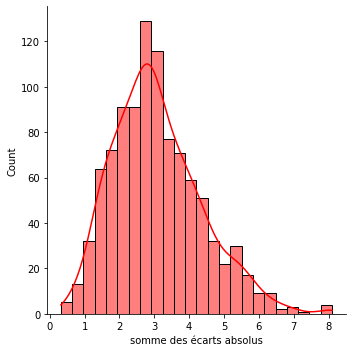

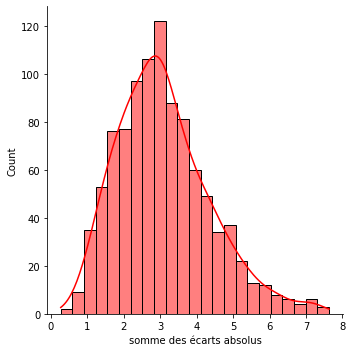

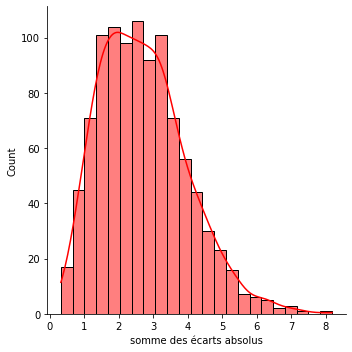

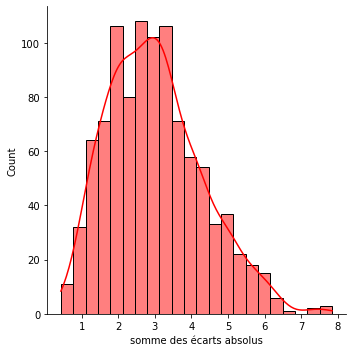

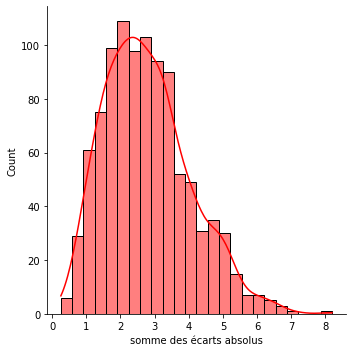

In [21]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_gauss_220830_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

## 3. Scenarios d'ajout cumulés et de deux loi gaussiennes discrètes centrées sur les bornes sur les scores sur un sous-échantillon n tiré aléatoirement de m entités

(array([1179., 1098.,  879.,  717.,  501.,  294.,  178.,   89.,   40.,
          10.,    4.,    5.,   41.,   85.,  155.,  262.,  521.,  716.,
         916., 1169., 1141.]),
 array([-10.        ,  -9.04761905,  -8.0952381 ,  -7.14285714,
         -6.19047619,  -5.23809524,  -4.28571429,  -3.33333333,
         -2.38095238,  -1.42857143,  -0.47619048,   0.47619048,
          1.42857143,   2.38095238,   3.33333333,   4.28571429,
          5.23809524,   6.19047619,   7.14285714,   8.0952381 ,
          9.04761905,  10.        ]),
 <BarContainer object of 21 artists>)

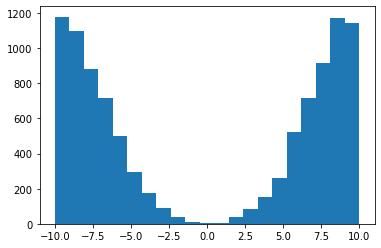

In [22]:
x = np.arange(-10, 11)
prob= np.array([0.13242928, 0.12533694,
 0.1062586,  0.08069342, 0.05489084, 0.03344625, 0.01825486, 0.00892463,
 0.00390822, 0.00153299,
0.00053861, 0.00153299, 0.00390822, 0.00892463, 0.01825486, 0.03344625,
 0.05489084, 0.08069342, 0.1062586,  0.12533694, 0.13242928])
prob = prob / prob.sum()
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))

### 3.1 n=10 ajouts et m=12 entités

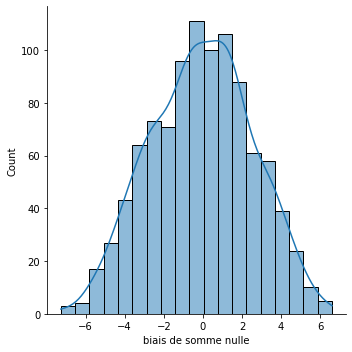

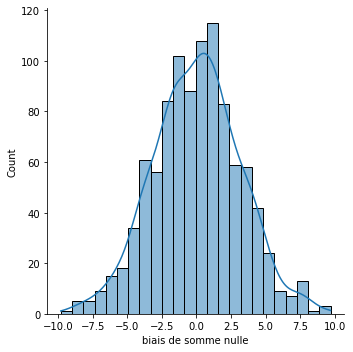

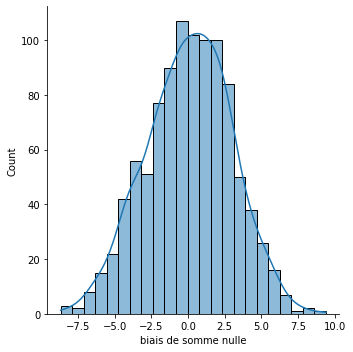

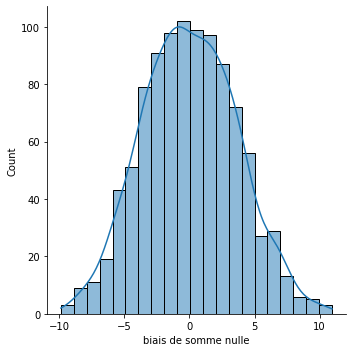

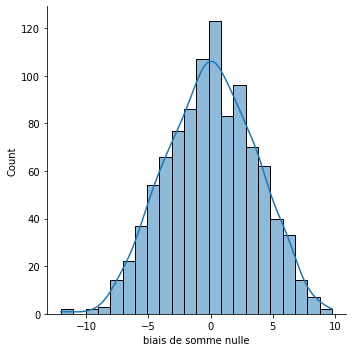

In [23]:
liste=["score_12_10_inversegauss_clean_1.csv",
       "score_12_10_inversegauss_clean_2.csv",
      "score_12_10_inversegauss_clean_3.csv",
      "score_12_10_inversegauss_clean_4.csv",
      "score_12_10_inversegauss_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

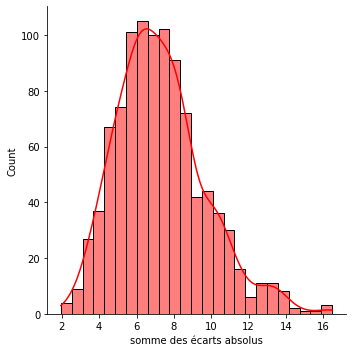

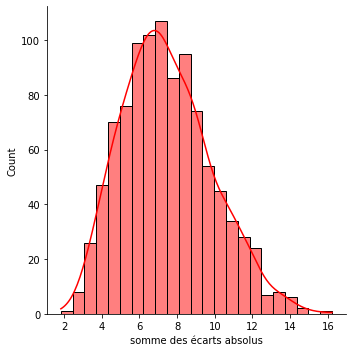

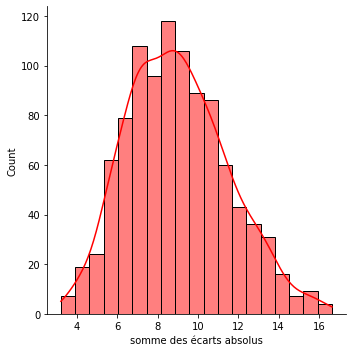

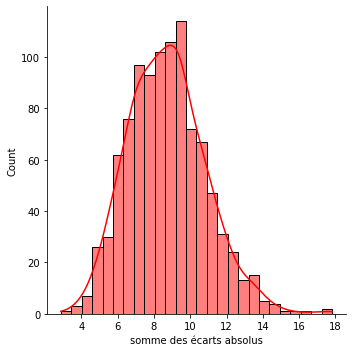

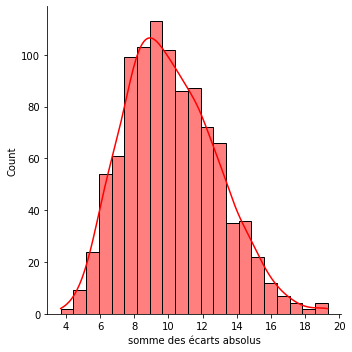

In [24]:
liste=["score_12_10_inversegauss_mea_clean_1.csv",
       "score_12_10_inversegauss_mea_clean_2.csv",
      "score_12_10_inversegauss_mea_clean_3.csv",
      "score_12_10_inversegauss_mea_clean_4.csv",
      "score_12_10_inversegauss_mea_clean_5.csv",]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.2 n=10 ajouts et m=100 entités

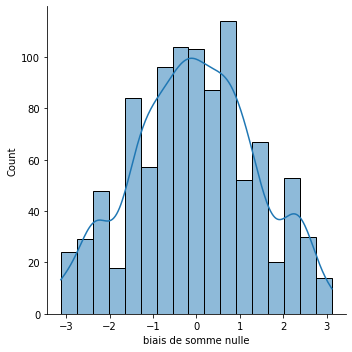

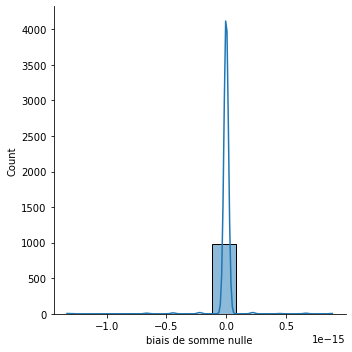

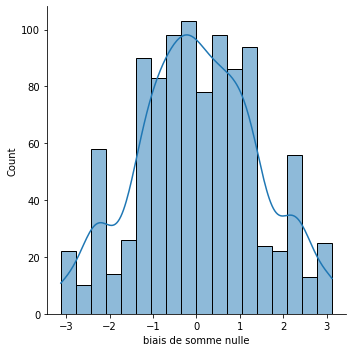

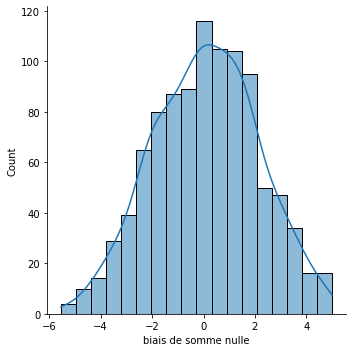

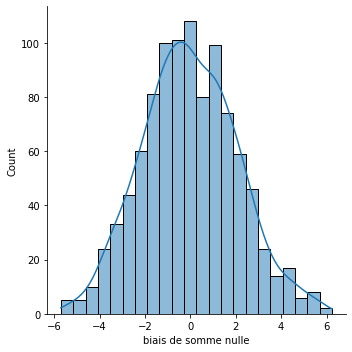

In [25]:
liste=["100_entities_10_samples/score_100_10_inversegauss_clean_1.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_2.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_3.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_4.csv",
      "100_entities_10_samples/score_100_10_inversegauss_clean_5.csv"]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

### 3.3 n=100 ajouts et m=1000 entités

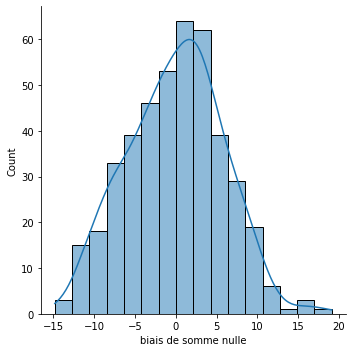

In [26]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_inversegauss_220828_clean_431.csv",meta_df,BIAIS_SN)

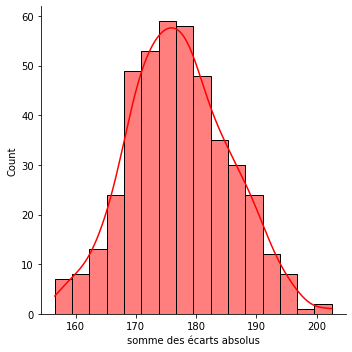

In [27]:
meta_df=afficher_histogramme_et_enregistrer_stat("1000_entities_100_samples/score_1000_100_inversegauss_mea_220828_clean_431.csv",meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.4 n=100 ajouts et m=20 entités

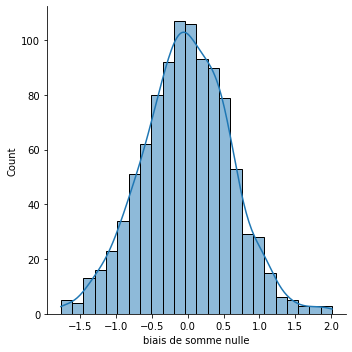

In [28]:
meta_df=afficher_histogramme_et_enregistrer_stat("score_20_100_inversegauss_220830.csv",meta_df,BIAIS_SN)

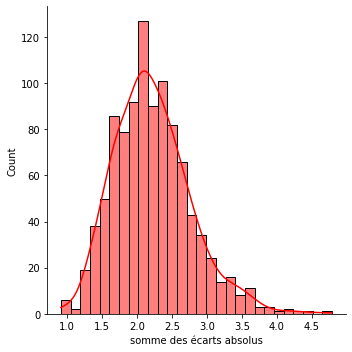

In [29]:
meta_df=afficher_histogramme_et_enregistrer_stat("score_20_100_inversegauss_mea_220830.csv",meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.5 n=1 ajouts et m=20 entités

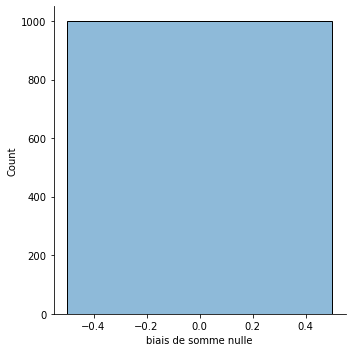

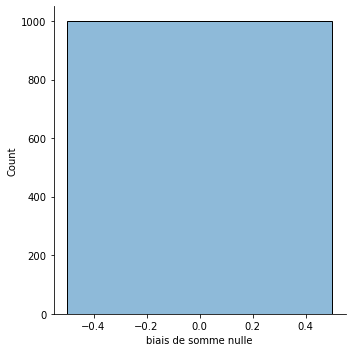

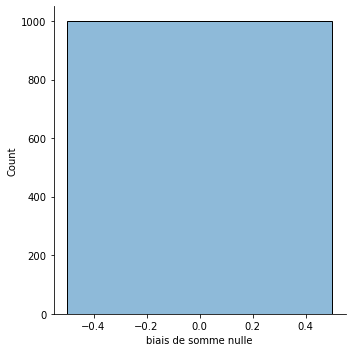

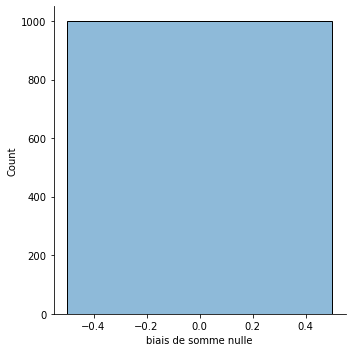

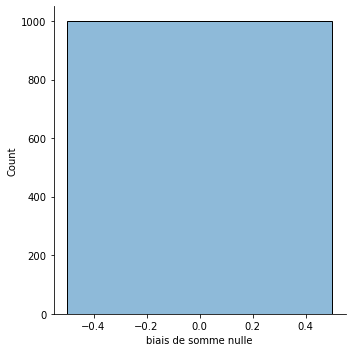

In [30]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_inversegauss_220830_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

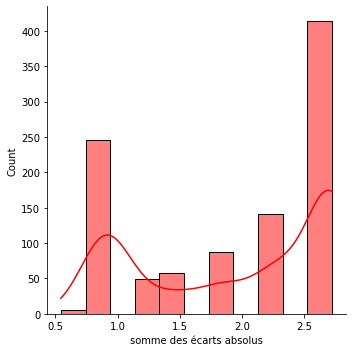

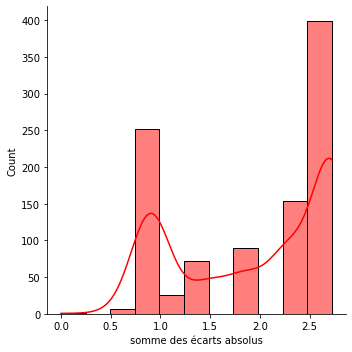

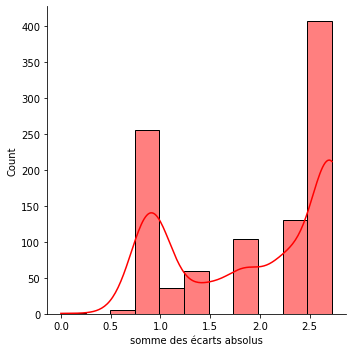

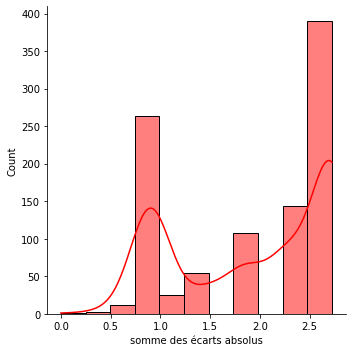

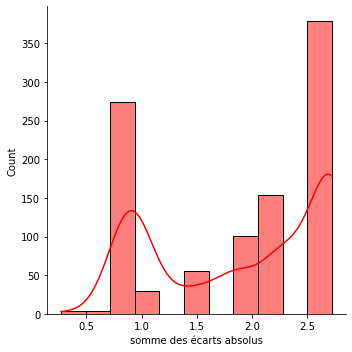

In [31]:
DIRECTORY="20_entities_1_samples"
liste=["{}/score_20_1_inversegauss_mea_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.6 n=5 ajouts et m=20 entités

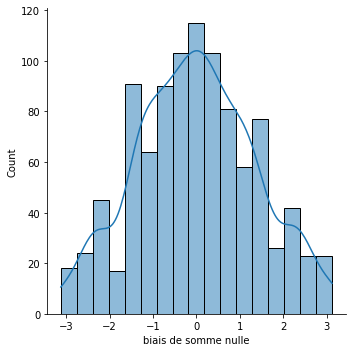

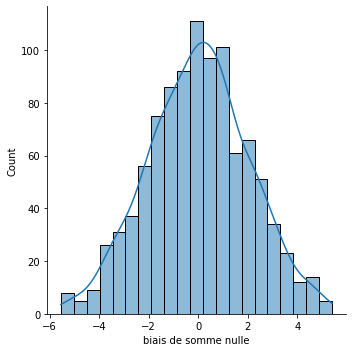

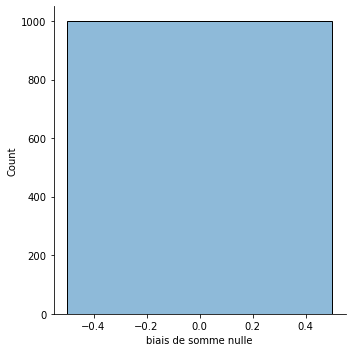

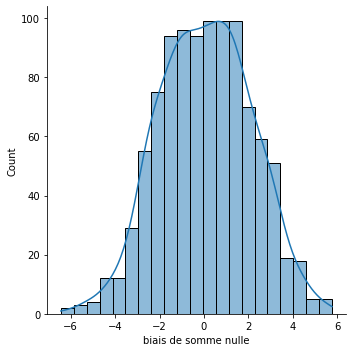

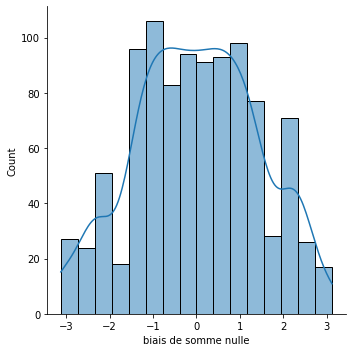

In [32]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_inversegauss_clean_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

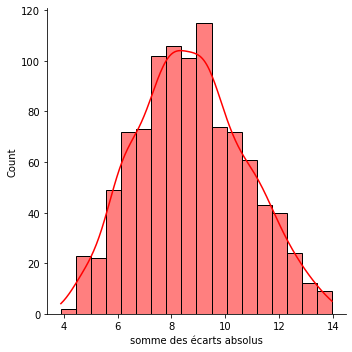

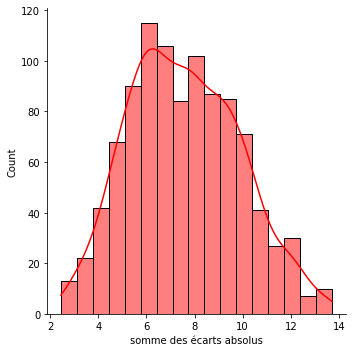

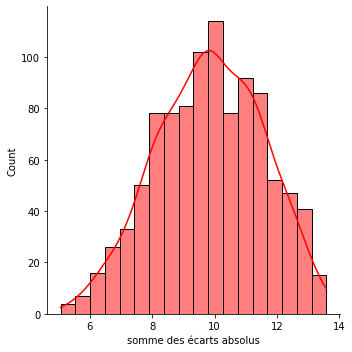

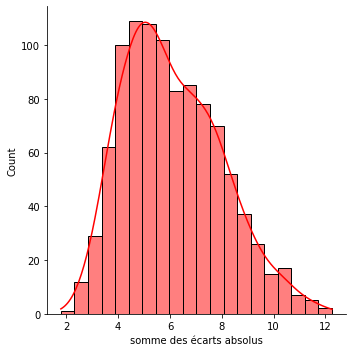

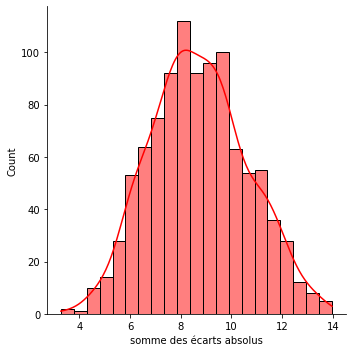

In [33]:
DIRECTORY="20_entities_5_samples"
liste=["{}/score_20_5_inversegauss_mea_220830_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

### 3.7 n=10 ajouts et m=20 entités

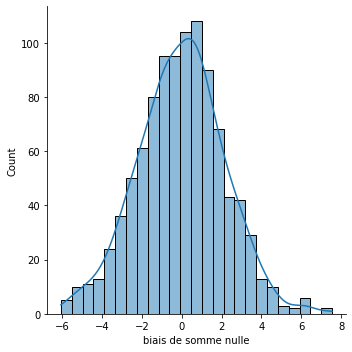

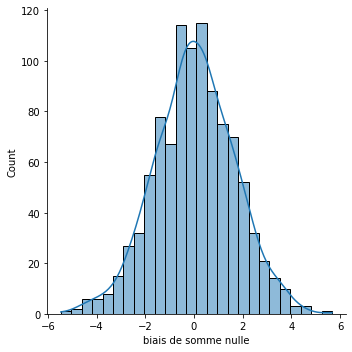

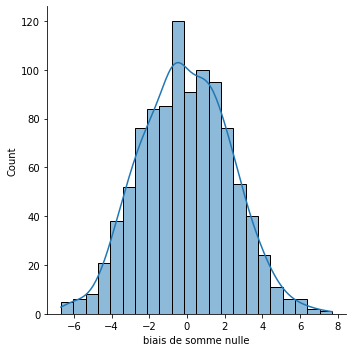

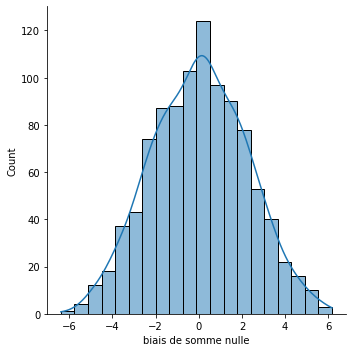

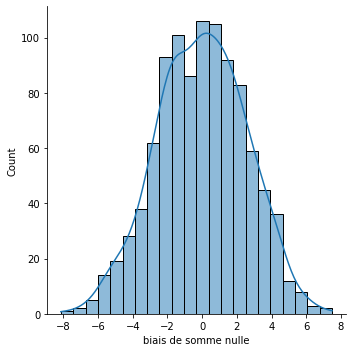

In [34]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_inversegauss_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)

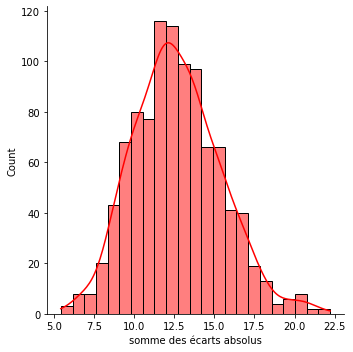

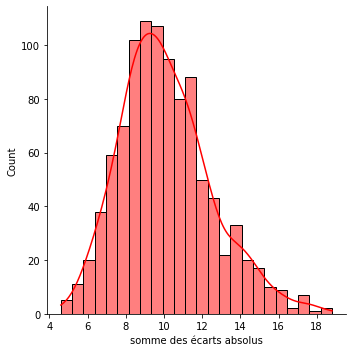

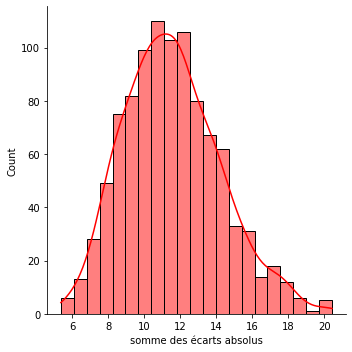

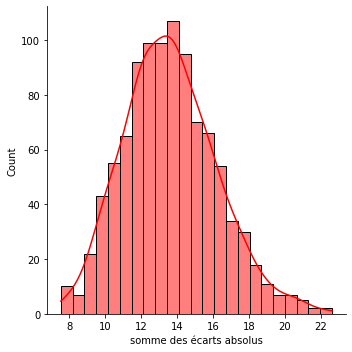

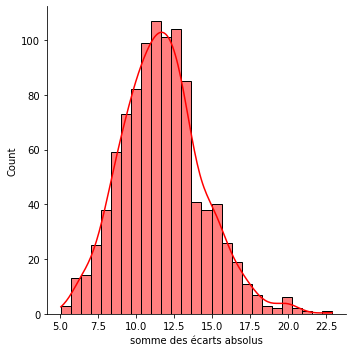

In [35]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_inversegauss_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [36]:
meta_df

,file,biais_sn_moyen,biais_sn_std,biais_sn_min,biais_sn_max,biais_sn_med
0,score_clean.csv,-0.126643,2.358996,-7.80187,7.148491,-0.066423
0,score2_clean.csv,0.078222,2.065059,-5.910564,7.338547,-0.000626
0,score3_clean.csv,0.042924,1.793612,-6.29097,6.983434,0.006462
0,score4_clean.csv,0.022976,2.329054,-6.951238,8.893555,0.092616
0,score5_clean.csv,0.022048,1.877426,-5.997512,5.632666,0.01805
...,...,...,...,...,...,...
0,20_entities_10_samples/score_20_10_inversegaus...,12.672696,2.720532,5.438715,22.212939,12.504524
0,20_entities_10_samples/score_20_10_inversegaus...,10.105392,2.386753,4.60634,18.802586,9.836586
0,20_entities_10_samples/score_20_10_inversegaus...,11.564683,2.672371,5.377405,20.43387,11.384114
0,20_entities_10_samples/score_20_10_inversegaus...,13.610103,2.570942,7.525389,22.628259,13.488051


In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_gaussian_220909_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_gaussian_220909_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_invgaussian_220909_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_invgaussian_220909_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220908_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_uniform_220908_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
DIRECTORY="20_entities_10_samples"
liste=["{}/score_20_10_uniform_220909_ws_clean_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_10_uniform_220909_ws_mea_{}.csv".format(DIRECTORY,i) for i in range(1,6)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")

In [ ]:
DIRECTORY="20_entities_100_samples"
liste=["{}/score_20_100_invgaussian_220911_clean_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,BIAIS_SN)
liste=["{}/score_20_100_invgaussian_220911_mea_{}.csv".format(DIRECTORY,i) for i in range(1,2)]
meta_df=afficher_histogramme_et_enregistrer_stat_pour_liste(liste,meta_df,SOMME_ECART_ABSOLU,color="red")